In [1]:
# 02_functional_image_processing.ipynb

# Basic Image Processing with Functions

# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
import os

Loading image from: /Users/vidyadharbendre/workspace/learn_computer_vision_using_examples/notebooks/data/images/roses.jpg


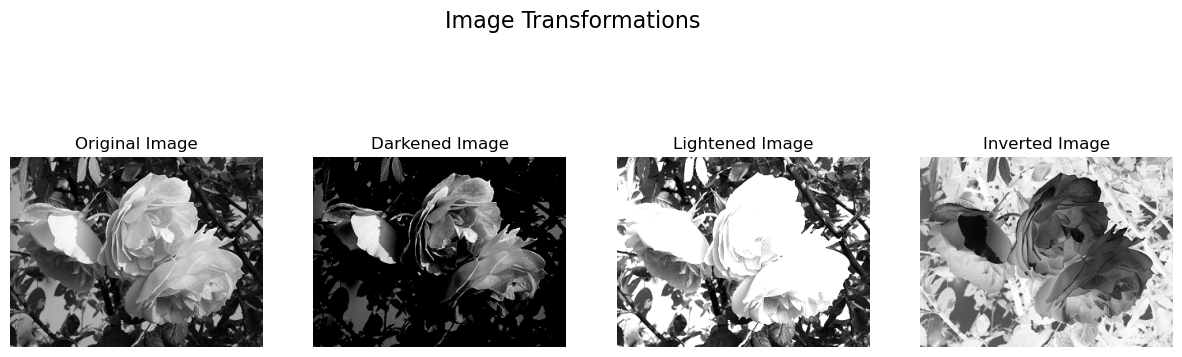

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to get the image path
def get_image_path(filename):
    return os.path.join(os.getcwd(), 'data', 'images', filename)

# Function to load the image in grayscale
def load_grayscale_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Error: Image could not be loaded. Please check the file path: {image_path}")
    return image

# Function to darken the image
def darken_image(image, value=128):
    return cv2.subtract(image, np.array([value], dtype=np.uint8))

# Function to lighten the image
def lighten_image(image, value=128):
    return cv2.add(image, np.array([value], dtype=np.uint8))

# Function to invert the image
def invert_image(image):
    return cv2.bitwise_not(image)

# Function to display images using matplotlib
def display_images(images_dict):
    fig, axs = plt.subplots(1, len(images_dict), figsize=(15, 5))
    fig.suptitle('Image Transformations', fontsize=16)
    
    for i, (title, img) in enumerate(images_dict.items()):
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(title)
        axs[i].axis('off')

    plt.show()

# Main function to handle everything
def main():
    image_path = get_image_path('roses.jpg')
    print(f"Loading image from: {image_path}")
    
    # Load the image in grayscale
    image = load_grayscale_image(image_path)
    
    # Apply transformations
    darkened_image = darken_image(image)
    lightened_image = lighten_image(image)
    inverted_image = invert_image(image)
    
    # Store the images in a dictionary for displaying
    images_dict = {
        'Original Image': image,
        'Darkened Image': darkened_image,
        'Lightened Image': lightened_image,
        'Inverted Image': inverted_image
    }
    
    # Display images using matplotlib
    display_images(images_dict)

# Execute the main function
if __name__ == "__main__":
    main()


Loading image from: /Users/vidyadharbendre/workspace/learn_computer_vision_using_examples/notebooks/data/images/roses.jpg


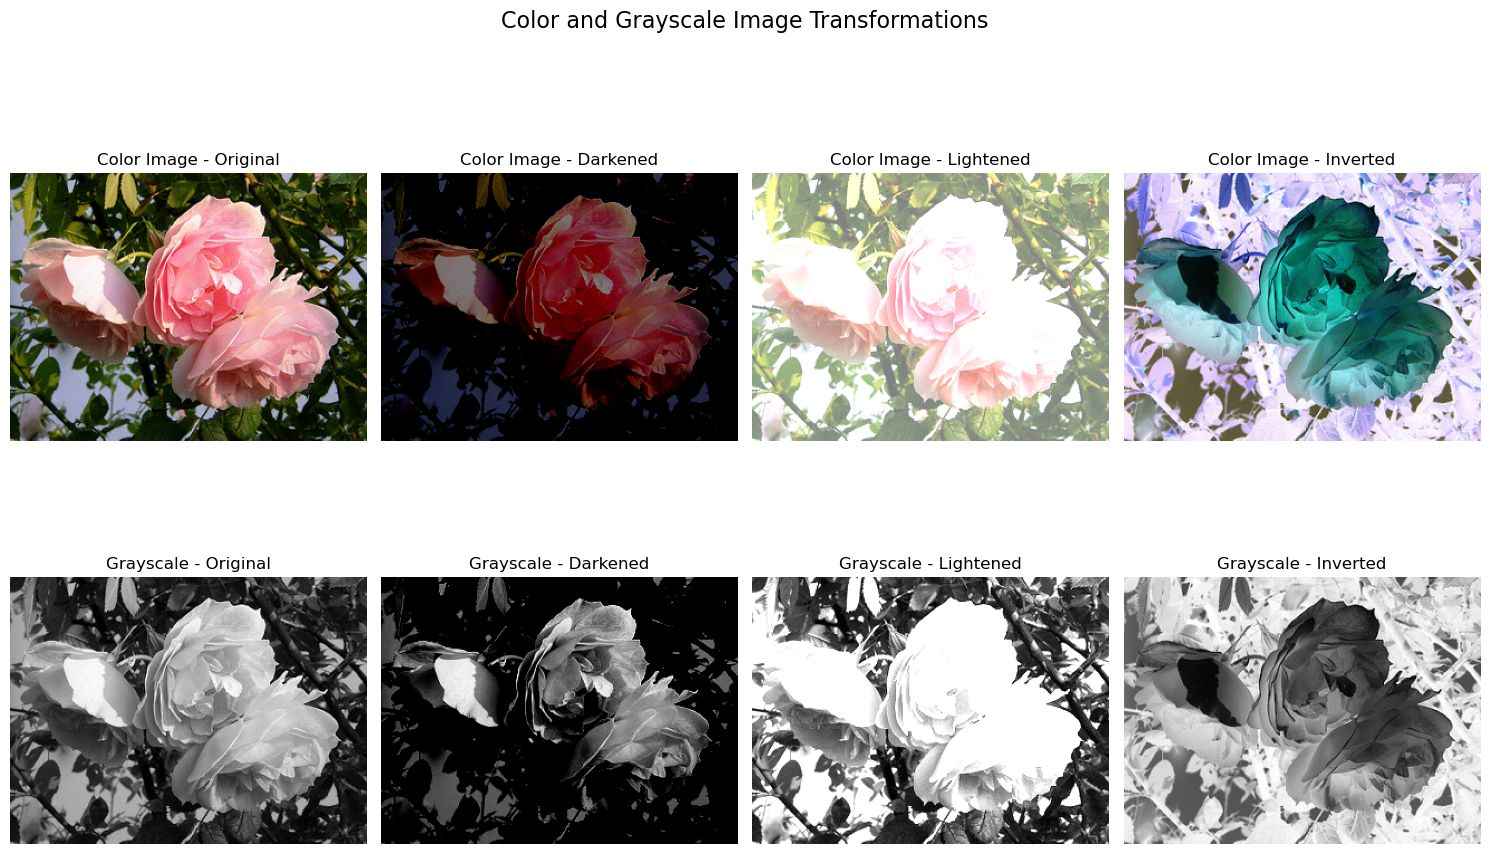

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to get the image path
def get_image_path(filename):
    return os.path.join(os.getcwd(), 'data', 'images', filename)

# Function to load the image in both color and grayscale
def load_image(image_path):
    color_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
    if color_image is None or grayscale_image is None:
        raise FileNotFoundError(f"Error: Image could not be loaded. Please check the file path: {image_path}")
    return color_image, grayscale_image

# Function to darken the grayscale image
def darken_image(image, value=128):
    return cv2.subtract(image, np.array([value], dtype=np.uint8))

# Function to lighten the grayscale image
def lighten_image(image, value=128):
    return cv2.add(image, np.array([value], dtype=np.uint8))

# Function to invert the grayscale image
def invert_image(image):
    return cv2.bitwise_not(image)

# Function to apply transformations to the color image
def transform_color_image(color_image, transformation):
    if transformation == "darken":
        return cv2.subtract(color_image, np.array([128, 128, 128], dtype=np.uint8))
    elif transformation == "lighten":
        return cv2.add(color_image, np.array([128, 128, 128], dtype=np.uint8))
    elif transformation == "invert":
        return cv2.bitwise_not(color_image)
    return color_image

# Function to display images using matplotlib
def display_images(color_image, grayscale_images_dict, color_images_dict):
    fig, axs = plt.subplots(2, len(grayscale_images_dict), figsize=(15, 10))
    fig.suptitle('Color and Grayscale Image Transformations', fontsize=16)
    
    # Display the color image in the first row
    for i, (title, grayscale_img) in enumerate(grayscale_images_dict.items()):
        # Display color transformation
        axs[0, i].imshow(cv2.cvtColor(color_images_dict[title], cv2.COLOR_BGR2RGB))
        axs[0, i].set_title(f'Color Image - {title}')
        axs[0, i].axis('off')

        # Display the corresponding grayscale transformations in the second row
        axs[1, i].imshow(grayscale_img, cmap='gray')
        axs[1, i].set_title(f'Grayscale - {title}')
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Main function to handle everything
def main():
    image_path = get_image_path('roses.jpg')
    print(f"Loading image from: {image_path}")
    
    # Load the image in both color and grayscale
    color_image, grayscale_image = load_image(image_path)
    
    # Apply transformations on grayscale image
    darkened_image = darken_image(grayscale_image)
    lightened_image = lighten_image(grayscale_image)
    inverted_image = invert_image(grayscale_image)
    
    # Apply transformations on color image
    color_darkened = transform_color_image(color_image, "darken")
    color_lightened = transform_color_image(color_image, "lighten")
    color_inverted = transform_color_image(color_image, "invert")

    # Store the grayscale images in a dictionary for displaying
    grayscale_images_dict = {
        'Original': grayscale_image,
        'Darkened': darkened_image,
        'Lightened': lightened_image,
        'Inverted': inverted_image
    }

    # Store the color images in a dictionary for displaying
    color_images_dict = {
        'Original': color_image,
        'Darkened': color_darkened,
        'Lightened': color_lightened,
        'Inverted': color_inverted
    }
    
    # Display both color and grayscale images
    display_images(color_image, grayscale_images_dict, color_images_dict)

# Execute the main function
if __name__ == "__main__":
    main()
